In [1]:
import numpy as np
from random import *
import matplotlib.pyplot as plt

In [2]:
n = int(input("Enter Number of Arms: ")) # number of arms = 3
N = int(input("Enter Number of Iterations:")) # number of simulations = 100000
reward = np.zeros(n, dtype = "float32")
print("Enter Values of Rewards:") # 1.2, 5.5, 3.8
for i in range(n):
    reward[i] = float(input())

print(f"Input of Rewards: {reward}")

Enter Number of Arms: 3
Enter Number of Iterations:100000
Enter Values of Rewards:
1.2
1.5
1.8
Input of Rewards: [1.2 1.5 1.8]


In [3]:
# Define Action class 
class Actions: 
    def __init__(self, m): 
        self.m = m # reward for arm
        self.mean = 0 # average reward for arm 
        self.N = 0 #Number of Simulations
  
  # Choose a random action 
    def choose(self):  
        return np.random.randn() + self.m  #adding a random number to reward to add noise
  
  # Update the action-value estimate 
    def update(self, x): 
        self.N += 1
        self.mean = (1 - 1.0 / self.N)*self.mean + 1.0 / self.N * x
    
    def run_experiment(rewards, N): 
        actions = []
        counts = []
        for i in range(len(rewards)):
            actions.append(Actions(rewards[i]))
            counts.append(Actions(rewards[i]).N)
        data = np.empty(N)
        
        n_arms = len(rewards)
        ucb = np.zeros(n_arms)
        
        def UCB1():
            tot_count = np.sum(counts)
            flag = True
            for i in range(n_arms):
                if counts[i] == 0:
                    flag = True 
                    return i
                else:
                    flag = False
                
            if(flag == False):
                for i in range(n_arms):
                    bonus = np.sqrt((2 * np.log(tot_count)) / float(counts[i]))
                    ucb[i] = actions[i].mean + bonus

            return np.argmax(ucb)
                     

        for i in range(N): 
            j = UCB1()  
            x = actions[j].choose() 
            actions[j].update(x)
            counts[j] += 1

            # for the plot 
            data[i] = x 
        cumulative_average = np.cumsum(data) / (np.arange(N) + 1) 

        for a in actions: 
            print(a.mean)
        return cumulative_average,counts
    
    def plotResult(cum_avg,rewards,N):
        # plot moving average ctr 
        plt.plot(cum_avg) 
        for i in range(len(rewards)):
            plt.plot(np.ones(N)*rewards[i]) 
            plt.xscale('log')
            plt.xlim(1,N)
            plt.ylim(0,6)
        plt.show()         

1.202126230186535
1.3840232058811262
1.7916634448100475


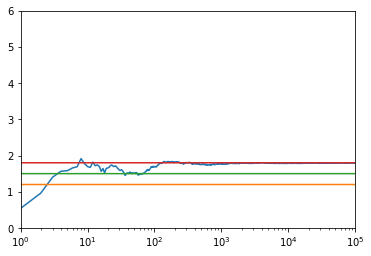

In [4]:
c_1 = Actions.run_experiment(reward,N)
Actions.plotResult(c_1[0],reward,N)

In [5]:
c_1[1]

[66, 133, 99801]